In [1]:
#예제 9-2
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
x=np.array([20,196,115,50,122,100,33,154,80,147,182,160])
y=np.array([114,921,560,245,575,475,138,727,375,670,828,762])
d={'y':y, 'x':x}
data=pd.DataFrame(data=d)

In [3]:
import scipy.stats as stats
# 1. 상관계수 2. 유의확률
stats.pearsonr(x,y)

(0.9985868822126776, 4.427099198655018e-14)

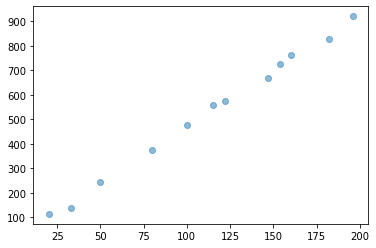

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x, y, alpha=0.5)
plt.show()

In [5]:
fit1=smf.ols('y~x', data=data).fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     3531.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           4.43e-14
Time:                        05:44:57   Log-Likelihood:                -48.393
No. Observations:                  12   AIC:                             100.8
Df Residuals:                      10   BIC:                             101.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7537      9.799      0.995      0.3

C:\Users\gksxk\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [6]:
fit2=smf.ols('y~x-1', data=data).fit()
print(fit2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.876e+04
Date:                Wed, 07 Dec 2022   Prob (F-statistic):                    3.93e-19
Time:                        05:45:21   Log-Likelihood:                         -48.960
No. Observations:                  12   AIC:                                      99.92
Df Residuals:                      11   BIC:                                      100.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\gksxk\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [7]:
from statsmodels.stats.anova import anova_lm
anova_lm(fit1).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
x,1.0,789526.872,789526.872,3530.777,0.0
Residual,10.0,2236.128,223.613,NaN,NaN


In [9]:
#예제 9.3
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

X=np.array([0.5,0.5,1.0,1.0,1.5,1.5,2.0,2.0,2.5,2.5])
Y=np.array([46,51,71,75,92,99,105,112,121,125])
data={'Y':Y, 'X':X}
data=pd.DataFrame(data=data)

fit1=smf.ols('Y~X', data=data).fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     254.4
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           2.39e-07
Time:                        06:25:53   Log-Likelihood:                -29.508
No. Observations:                  10   AIC:                             63.02
Df Residuals:                       8   BIC:                             63.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.3500      3.836      8.954      0.0

C:\Users\gksxk\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [10]:
#잔차표준화
sqrt1=np.sqrt(fit1.mse_resid)
std1=fit1.resid/sqrt1
pre1=fit1.predict()

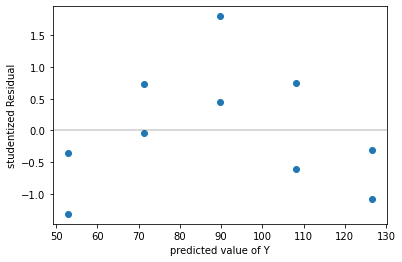

In [11]:
#잔차도표
plt.scatter(pre1, std1)
plt.axhline(y=0, color='k', linewidth=0.3)
plt.xlabel('predicted value of Y')
plt.ylabel('studentized Residual')
plt.show()

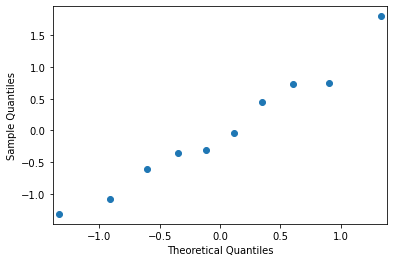

In [12]:
#정규확률지
import statsmodels.api as sm
p1=sm.qqplot(std1)

In [13]:
#변수변환
data['rootX']=np.sqrt(data['X'])
fit2=smf.ols('Y~rootX', data=data).fit()
data.head()

print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     597.8
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           8.36e-09
Time:                        06:25:56   Log-Likelihood:                -25.325
No. Observations:                  10   AIC:                             54.65
Df Residuals:                       8   BIC:                             55.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.6871      4.284     -2.728      0.0

C:\Users\gksxk\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


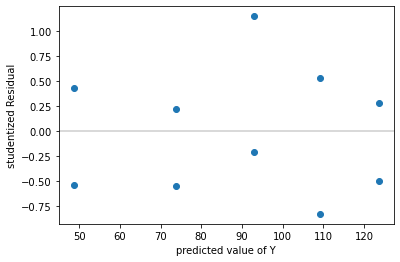

In [14]:
#잔차표준화
sqrt2=np.sqrt(fit2.mse_resid)
std2=fit2.resid/sqrt1
pre2=fit2.predict()

#잔차도표
plt.scatter(pre2, std2)
plt.axhline(y=0, color='k', linewidth=0.3)
plt.xlabel('predicted value of Y')
plt.ylabel('studentized Residual')
plt.show()

In [15]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

data=pd.read_csv('ex9-4.csv')
data.head(4)     

,X,Y
0,9.5,14814
1,8.4,17502
2,9.8,14007
3,11.0,19443


In [16]:
fit1=smf.ols('Y~X', data).fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     110.2
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           3.25e-11
Time:                        07:36:07   Log-Likelihood:                -322.35
No. Observations:                  30   AIC:                             648.7
Df Residuals:                      28   BIC:                             651.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.543e+04   6104.704     -4.166      0.0

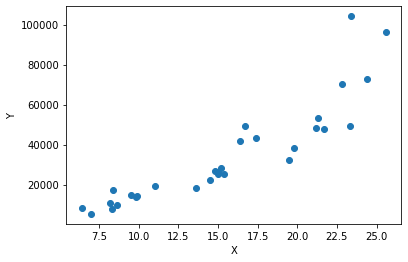

In [17]:
#산점도
import matplotlib.pylab as plt
plt.plot(data['X'], data['Y'], 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

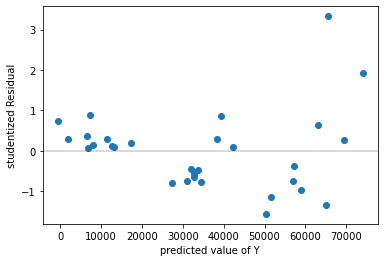

In [18]:
#잔차도표
plt.plot(fit1.predict(),fit1.resid_pearson, 'o')
plt.axhline(y=0, color="k", linewidth=0.3)
plt.xlabel('predicted value of Y')
plt.ylabel('studentized Residual')
plt.show()

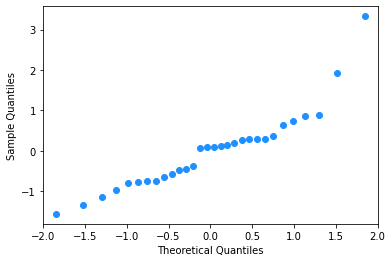

In [19]:
#정규확률지
import statsmodels.api as sm
p1=sm.qqplot(fit1.resid_pearson, markerfacecolor='dodgerblue', 
             markeredgecolor='dodgerblue', marker='o')
plt.xlim([-2, 2])        #정규확률지 X축의 범위 지정
plt.show()

In [20]:
#변수변환
data["logY"]=np.log(data["Y"])
fit2=smf.ols('logY~X', data).fit()
data.head(3)

,X,Y,logY
0,9.5,14814,9.603328
1,8.4,17502,9.770070
2,9.8,14007,9.547312


In [21]:
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                   logY   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     256.7
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           1.24e-15
Time:                        07:36:45   Log-Likelihood:                0.67010
No. Observations:                  30   AIC:                             2.660
Df Residuals:                      28   BIC:                             5.462
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2574      0.129     64.185      0.0

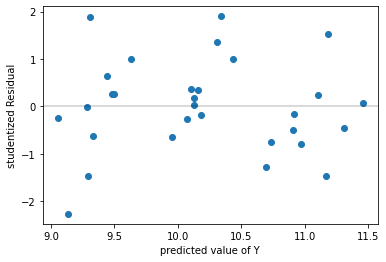

In [22]:
#잔차도표
plt.scatter(fit2.predict(),fit2.resid_pearson)
plt.axhline(y=0, color="k", linewidth=0.3)
plt.xlabel('predicted value of Y')
plt.ylabel('studentized Residual')
plt.show()